In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../spectra/')
import spectra

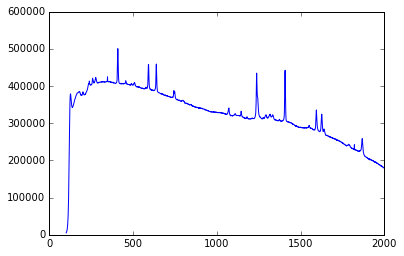

In [3]:
dpath = os.path.join('..', 'test_data', 'raman-785nm.txt')
data1 = np.genfromtxt(dpath)
plt.plot(data1[:, 0], data1[:, 1])

In [12]:
F = spectra.Spectra(dpath)

F.find_background(cutoff=1.0/1000,order=2)

Loading file ... 
../test_data/raman-785nm.txt
Peak width of about -1622.26 (in x-data units)
Finding background ... 


array([ 210901.50688319,  211016.2385517 ,  211131.15926551, ...,
        376494.65038304,  376494.66051092,  376494.66825146])

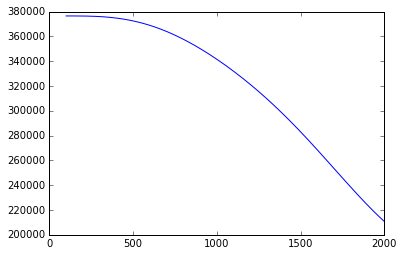

In [13]:
plt.plot(F.x,F.bg,'b-')

Looking for peaks ... 
Found 41 peaks at [3, 4, 26, 54, 69, 138, 187, 220, 301, 384, 416, 459, 531, 597, 666, 683, 705, 755, 840, 907, 976, 985, 1015, 1037, 1048, 1103, 1144, 1188, 1277, 1315, 1384, 1398, 1425, 1462, 1511, 1565, 1579, 1597, 1624, 1641, 1682]
After filtering out peaks below  5 percent, we have  41  peaks.
Using  2  peaks at  [1277, 1462]


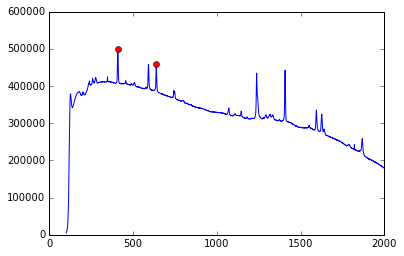

In [19]:
F.find_peaks(width=5, w_range=10, threshold=5, limit=2, smooth=False)
plt.plot(F.x,F.y,'b-',F.x[F.peak_pos],F.y[F.peak_pos],'ro')

In [20]:
F.build_model('LO')

Building model ... 
Peak 0: pos 638.722, height 458982.0
Peak 1: pos 409.204, height 498541.0


(Parameters([('bg_c0', <Parameter 'bg_c0', 0, bounds=[-inf:inf]>),
             ('bg_c1', <Parameter 'bg_c1', 0, bounds=[-inf:inf]>),
             ('bg_c2', <Parameter 'bg_c2', 0, bounds=[-inf:inf]>),
             ('p0_sigma', <Parameter 'p0_sigma', 2.5, bounds=[1.25:10]>),
             ('p0_center',
              <Parameter 'p0_center', 638.72199999999998, bounds=[-inf:inf]>),
             ('p0_amplitude',
              <Parameter 'p0_amplitude', 3604836.1983248759, bounds=[-inf:inf]>),
             ('p1_sigma', <Parameter 'p1_sigma', 2.5, bounds=[1.25:10]>),
             ('p1_center',
              <Parameter 'p1_center', 409.20400000000001, bounds=[-inf:inf]>),
             ('p1_amplitude',
              <Parameter 'p1_amplitude', 3915531.8577832724, bounds=[-inf:inf]>)]),
 <lmfit.Model: ((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_'))>)

In [21]:
F.fit_data()

Fitting Data...
[[Model]]
    ((Model(polynomial, prefix='bg_') + Model(lorentzian, prefix='p0_')) + Model(lorentzian, prefix='p1_'))
[[Fit Statistics]]
    # function evals   = 248
    # data points      = 1701
    # variables        = 9
    chi-square         = 2093350886942.283
    reduced chi-square = 1237205015.923
    Akaike info crit   = 35630.341
    Bayesian info crit = 35679.292
[[Variables]]
    bg_c0:          3.5653e+05 +/- 3.52e+03 (0.99%) (init= 0)
    bg_c1:          71.9718803 +/- 7.120285 (9.89%) (init= 0)
    bg_c2:         -0.07772505 +/- 0.003212 (4.13%) (init= 0)
    p0_sigma:       9.99999645 +/- 0.894338 (8.94%) (init= 2.5)
    p0_center:      637.445481 +/- 2.612459 (0.41%) (init= 638.722)
    p0_amplitude:   1.6643e+06 +/- 4.63e+05 (27.80%) (init= 3604836)
    p1_sigma:       9.99999349 +/- 9.174555 (91.75%) (init= 2.5)
    p1_center:      408.468621 +/- 1.456728 (0.36%) (init= 409.204)
    p1_amplitude:   3.0462e+06 +/- 4.85e+05 (15.93%) (init= 3915532)

